In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0, parse_dates=["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [4]:
print(df.shape)
df.head()

(1304, 1)


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df = df[(df["value"] >= (df["value"].quantile(0.025))) & (df["value"] <= (df["value"].quantile(0.975)))]
print(df.shape)
df.head()

(1238, 1)


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0, 0.5, 'Page Views')

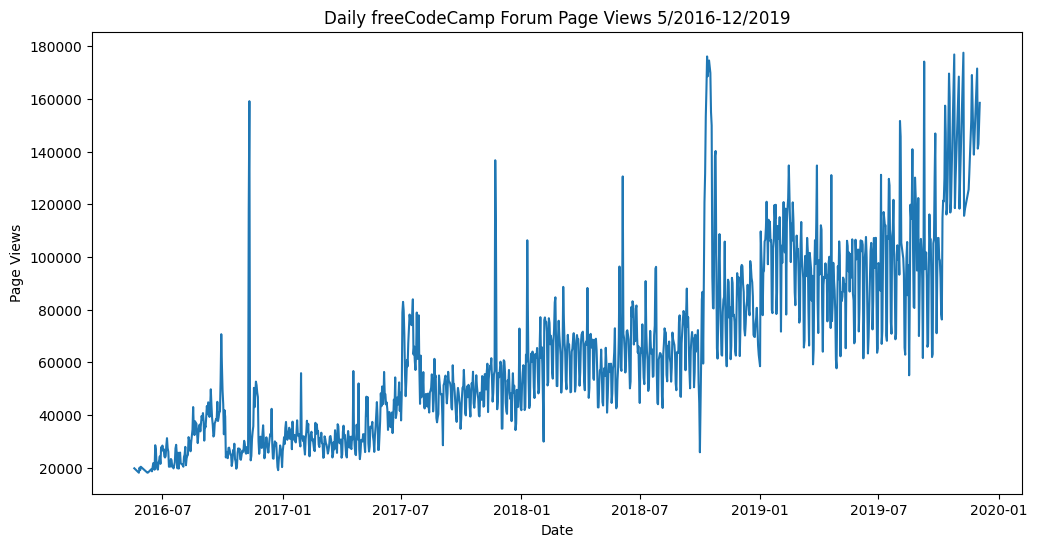

In [8]:
# LINE PLOT
# The title should be: "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
# Label on x axis: "Date"
# Label on y axis: "Page Views"

line_df = df

plt.figure(figsize=(12,6))
plt.plot(line_df.index, line_df["value"])
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")